# TOPIC: Analysis of Household Power Consumption in Gyalpozhing
## Group 6
1. Anisha Rai (12190041)
2. Rashmi Gurung (12190072)
3. Sonam Dema (12190081)
4. Tashi Namgay (12190086)

#1. IMPORT LIBRARIES

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from matplotlib import pyplot as plt


#2. LOAD DATA

In [77]:
#Load data

main_df = pd.read_excel('Gyalpozhing_household_power_consumption.XLSX')
main_df.head()

,BP Number,BP_name,CA_number,portion,posting_Date,Due Date,Billing Period,Print Doc. No.,Billing Doc. No.,consumption,...,current,voltage,energy_Charges,Demand Charges,Penalty Charges,Recon Key,G/L Account,Category,FICA Doument no,Search term1
0,1702371.0,Company Lemon Grass Factory Kurizampa,50000504.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,167.0,...,1.166136,234.0,589.51,0.0,0.00,19015R040045,300002,LV Agricultural,4.000049e+11,LEMON FACTORY
1,1705727.0,Company RBA Gyelposhing,50001004.0,P17_41,2019-01-02,2019-02-01,2019/01,4.003612e+09,9.018221e+09,788.0,...,5.502486,234.0,2781.64,0.0,0.00,190115R4/17,300002,LV Agricultural,9.434803e+07,"RAMS, GYELPOSHING"
2,1702588.0,N R D C Gyelposhing,60001500.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,N R D C
3,1702586.0,Swerage Treatment Plant,60000307.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,SWERAGE PLANT
4,1709983.0,Company Rabsel Construction Pvt.Ltd Gyelposhing,60006107.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,1880.0,...,13.127758,234.0,7557.60,0.0,463.18,19015R040045,300003,LV Bulk,4.000049e+11,RABSEL CONSTRUCTION


# 3. DATA PREPROCESSING 

In [78]:
# Creating a new dataframe with the only required attributes:

df = pd.DataFrame(main_df,columns=['Category','portion','posting_Date','current','voltage','consumption','energy_Charges'])
df.tail()

,Category,portion,posting_Date,current,voltage,consumption,energy_Charges
25377,LV Urban Domestic Customers,P17_40,2022-03-02,3.505391,234.0,502.0,1207.28
25378,MV Industrial,P17_41,2022-03-02,830.316742,234.0,118908.0,315106.20
25379,LV Bulk,P17_41,2022-03-16,0.000000,234.0,0.0,0.00
25380,NaN,NaN,NaT,NaN,NaN,NaN,NaN
25381,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [79]:
df.shape

(25382, 7)

In [80]:
df.isna().sum()

Category          2
portion           2
posting_Date      2
current           2
voltage           2
consumption       2
energy_Charges    2
dtype: int64

In [81]:
df = df.dropna()
df.isna().sum()

Category          0
portion           0
posting_Date      0
current           0
voltage           0
consumption       0
energy_Charges    0
dtype: int64

In [82]:
# Selecting the data from 2019 till 2021 only:

# df = df.loc[(df['posting_Date'] >= '01-01-2019') & (df['posting_Date'] < '01-01-2022')]
# df.tail()

In [83]:
# Extracting the year and montht from the posting_date
# Adding these two new columns(Year and month) and then droping the posting date col

df['Year'] = pd.to_datetime(df['posting_Date']).dt.year
df['Month'] = pd.to_datetime(df['posting_Date']).dt.month
df = df.drop(['posting_Date'], axis = 1)

In [84]:
df.head()

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
0,LV Agricultural,P17_41,1.166136,234.0,167.0,589.51,2019,1
1,LV Agricultural,P17_41,5.502486,234.0,788.0,2781.64,2019,1
2,LV Bulk,P17_41,0.000000,234.0,0.0,0.00,2019,1
3,LV Bulk,P17_41,0.000000,234.0,0.0,0.00,2019,1
4,LV Bulk,P17_41,13.127758,234.0,1880.0,7557.60,2019,1


In [85]:
df.dtypes

Category           object
portion            object
current           float64
voltage           float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

In [86]:
df.duplicated().sum()

6361

In [87]:
df = df.drop_duplicates(keep='first')

In [88]:
df.shape

(19019, 8)

# 5.  EDA and VISUALIZATION

In [89]:
! python -m pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import plotly
import plotly.express as px

In [91]:
px.histogram(df, x="Year", y="consumption", color="Year", title="Yearly Change of Energy Consumption").update_layout(
    xaxis_title="Year", yaxis_title="Energy Consumption (Kwatt)")


In [92]:
px.histogram(df, x="Category", y="consumption", color="Category", title="Energy Consumption by Different Categories").update_layout(
    xaxis_title="Category(Type of Consumer)", yaxis_title="Energy Consumption (Kwatt)")


In [93]:
px.histogram(df, x="portion", y="consumption",color="Year",barmode="group", title="Energy Consumption in Different Portion/location of each Year").update_layout(
    xaxis_title="Portion(Location)", yaxis_title="Energy Consumption (Kwatt)")


In [94]:
px.histogram(df, x="Month", y="consumption", color="Month",title="Energy Consumption in Each Month of the Past Three Years").update_layout(
    xaxis_title="Month", yaxis_title="Energy Consumption (Kwatt)")

In [95]:
df.head()

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
0,LV Agricultural,P17_41,1.166136,234.0,167.0,589.51,2019,1
1,LV Agricultural,P17_41,5.502486,234.0,788.0,2781.64,2019,1
2,LV Bulk,P17_41,0.000000,234.0,0.0,0.00,2019,1
4,LV Bulk,P17_41,13.127758,234.0,1880.0,7557.60,2019,1
5,LV Bulk,P17_41,48.600637,234.0,6960.0,27979.20,2019,1


In [96]:
# yeardf = df.groupby('Year')
# yeardf

In [97]:
# px.line(yeardf, x="2019", y="consumption", title="Energy Consumption in Each Month of the Past Three Years").update_layout(
#     xaxis_title="Month", yaxis_title="Energy Consumption (Kwatt)")

In [98]:
import plotly.graph_objs as go
df = df[df['consumption'] > 0.00]


condf = df[df['Year']==2021]
yondf = df[df['Year']==2019]

df['consumption'] = df['consumption'].astype('object')
df['consumption'] = df['consumption'].astype('object')

fig = go.Figure()
fig.add_trace(go.Scatter(x = condf['Month'], y = condf['consumption'],
                  name='consumption in 2021 (in NU)'))
fig.add_trace(go.Scatter(x = yondf['Month'], y = yondf['consumption'],
                  name='consumption in 2020 (in NU)'))

# fig.add_trace(go.Box(y=condf['consumption'], name='consumption in year 2021 (in watt)',
#                     marker_color = 'indianred'))


# fig.add_trace(go.Box(y=yondf['consumption'], name='consumption in year 2019 (in watt)',
#                     marker_color = 'indianred'))
fig.update_layout(
             title='Summary of power comsumption in Gyelpozhing (2021)',
             paper_bgcolor='#27293d',
             font=dict(color='white'),
             showlegend=True

        )
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df = df[df['consumption'] >-476.15999999999997]

petroldf = df[df['Year']==2021]
dieseldf = df[df['Year']==2019]
yeardf = df[df['Year']==2020]

petrolg = petroldf[petroldf['portion']==1]
# dieselg = dieseldf[dieseldf['portion']==1]



p = petrolg.sort_values(by='Month')
d = dieseldf.sort_values(by='Month')
e =d = yeardf.sort_values(by='Month')

In [100]:
tconsumption = pd.DataFrame(np.array(e.groupby(["Month"])['consumption'].sum()), columns=['totalconsumption'])
tconsumption.head()

,totalconsumption
0,136817.0
1,154308.0
2,120549.0
3,115661.0
4,128294.0


In [101]:
edf = pd.concat([tconsumption, pd.DataFrame(np.array(e['Month'].unique()), columns=['Month'])], axis=1)
edf.head()

,totalconsumption,Month
0,136817.0,1
1,154308.0,2
2,120549.0,3
3,115661.0,4
4,128294.0,5


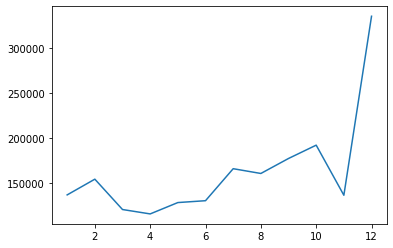

In [102]:
plt.plot(edf['Month'],edf['totalconsumption'])

In [103]:
edf.to_csv('totalconsumption2.csv')

In [104]:
# df['Year'].unique()

In [105]:
# df = pd.read_csv('bhutan_fuel_prices.csv') 
# # print(df.head())
# # print('hello')

# df['Product'] = df['Product'].replace('HSD (in KL)', 'Diesel')
# df['Product'] = df['Product'].replace('MS (in KL)', 'Petrol')


# index_names = df[ df['Region'] == '\x1a' ].index
  
# # drop these row indices from dataFrame
# df.drop(index_names, inplace = True)

# # Drop the "RSP/KL" column
# df.drop(["RSP/KL"], axis = 1, inplace = True)

# df['RSP/L'] = df['RSP/L'].replace(0, np.nan)

# from sklearn.impute import SimpleImputer

# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp = imp.fit_transform(df)

# df = pd.DataFrame(imp, columns=df.columns)
# # print(df.head())


# df = df[df['RSP/L'] > 27.555]

# petroldf = df[df['Product']=='Petrol']
# dieseldf = df[df['Product']=='Diesel']

# petrolg = petroldf[petroldf['Station']=='Gyelposing']
# dieselg = dieseldf[dieseldf['Station']=='Gyelposing']



# p = petrolg.sort_values(by='Approved_Date')
# d = dieselg.sort_values(by='Approved_Date')

In [106]:
# print(p)
# print(d)

In [107]:
# fig = go.Figure()

# fig.add_trace(go.Scatter(x = p['Approved_Date'], y = p['RSP/L'],
#                   name='Petrol Price per L (in NU)'))
    
# fig.add_trace(go.Scatter(x = d['Approved_Date'], y = d['RSP/L'],
#                   name='Diesel Price per L (in NU)'))
# fig.update_layout(
#             title='Fuel Prices of Gyelpozhing over time (2020-01-15 - 2022-04-01)',
#         paper_bgcolor='#27293d',
#         font=dict(color='white'),
#         showlegend=True

#         )
# fig.show()